# Lab 3: Classification (Scikit-learn)

In this lab we will explore MNIST, a classic machine learning data set of images of handwritten digits (i.e., 0, 1, 2, 3, ...).
In addition, we will investigate an intuitive, yet powerful learning method called k-nearest neighbors (KNN) as an illustrating example on how to use Scikit. 
Even though the type of data is different from what we've worked with so far, we'll see how to apply familiar tools to the data, namely, scikit learn and matplotlib for machine learning and plotting in python.

And if you haven't already, download the dataset file [mnist-original.mat](https://ufl.instructure.com/files/74909127/download?download_frd=1) into the `DATA_PATH` directory which is defined below (you can change it to where you want to save the dataset). Then run the code below:

In [3]:
%pylab inline
import pylab
import sklearn
from sklearn.utils import Bunch
from scipy.io import loadmat
import os

# DATA_PATH is the directory where you place the mat file "mnist-original.mat"
DATA_PATH = './'
mnist_path = os.path.join(DATA_PATH, "mnist-original.mat") 
mnist_raw = loadmat(mnist_path)
mnist = Bunch(
    data = mnist_raw["data"].T,
    target = mnist_raw["label"][0],
    COL_NAMES = ["label", "data"],
    DESCR = "mldata.org dataset: mnist-original",
)

Populating the interactive namespace from numpy and matplotlib


## MNIST

<center>
    <img src="http://3.bp.blogspot.com/_UpN7DfJA0j4/TJtUBWPk0SI/AAAAAAAAABY/oWPMtmqJn3k/s320/mnist_originals.png">
</center>

The [MNIST database](http://yann.lecun.com/exdb/mnist/) of handwritten digits is a collection of labeled images that has been used to evaluate machine learning techniques since the '90's.
The core application of the MNIST data is to train computer vision systems to recognize handwritten text.
The post office, for example, is a major user of such systems---addresses on letters and packages are all photographed, read, and routed digitally, with only a few ambiguous cases verified by a human.

The MNIST data set has also become a reliable benchmark for learning methods.
It's small, but not tiny, and the data dimensionality (28x28 pixels) is big enough to cause some "curse of dimensionality" issues.
Also, the problem is highly non-linear, meaning a linear classification methods (like linear regression, but for predicting discete categories) don't perform so well on the raw data.
The MNIST [website](http://yann.lecun.com/exdb/mnist/) reports an extensive list of results obtained by different machine learning models, including neural nets, SVM, nearest neighbors, and others.

The data consists of 60,000 training images and 10,000 test images.
Each image is a 28x28 pixel, grayscale picture of a digit written either by a highschool student or an employee of the US Census Bureau.
The images have all been preprocessed to be clean and regular: only one digit appears in each image, and it appears directly in the center of the image.

The goal of the benchmark is to fit a model to the training set, and then use that model to predict which digit is in each of the test images.
The best results achieve a classification error rate of less than half of one percent.
This is often described as the "human error rate," because if you ask people to classify the images, they will also find about 0.5% of them to be comepletely inscrutable.

### MNIST Data

Let's take a look at the data.
Make sure you've loaded the data set by running the code at the top of the lab.

The image data itself is in `mnist.data`, and it's stored in a numpy [n-dimensional array](http://docs.scipy.org/doc/numpy/reference/arrays.ndarray.html) (n=2 in this case).
Numpy array is a vector/matrix data structure that provides high performance numerical computing.

We can find out the dimensions of the array with its `shape` property:

In [4]:
mnist.data.shape

(70000, 784)

There are 70,000 rows and 784 columns.
So each row is an image (60,000 training images plus 10,000 test ones gives 70,000 total), and each column is a pixel value (784 = 28 * 28).

Like Pandas DataFrames, numpy arrays give us a simple interface to summary statistics and subsets of the data.

Numpy arrays are indexed dimension-wise, with each dimension separated by a comma:

In [5]:
row = mnist.data[0,:] # First row of the array
col = mnist.data[:,0] # First column of the array

print (row.shape)
print (col.shape)

(784,)
(70000,)


In this syntax, the ":" means "ALL" in the corresponding dimension, as in standard python indexing.
All of the usual python range indexing syntax works for each dimension of the array.
We can compute summary statistics, too:

In [6]:
print (row.sum(), row.max(), row.min())
print (col.sum(), col.max(), col.min())

print (mnist.data[:10,:]) # First ten rows
print (mnist.data[:,-10:]) # Last ten columns

31095 255 0
0 0 0
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]



Let's divide the array into two sets, one for training and one for testing:

In [7]:
train = mnist.data[:60000]
test = mnist.data[60000:]

Note that we can drop the trailing ",:" when we want to just index the first dimension.

* To start, we want to work with just a sample of the training data. Create a sample consisting of every 100th image in `test`.

* Find the mean value of the 300th column in the sample data set.

In [8]:
test_sample = test[::100] # array[s:e:i] means from array[s] to array[e-1], return elements with step interval i
test_sample[:,299].mean()

88.819999999999993

## Visualizing Image Data

One of the nicest things about image data is that it can be naturally visualized and understood.
First, let's take a look at the raw data in the first image in the data set:



In [9]:
img = mnist.data[0]
print (img)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  51 159 253 159  50   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252
 253 122   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0 163 252 252 252 253 252 252  96 189 253 167   

These are all the pixel values in the image.
We can see some patterns (e.g., some images are empty), but it's hard to interpret.
In fact, we can have a much better view if we use the `imshow` method from matplotlib to display an image:

TypeError: Invalid dimensions for image data

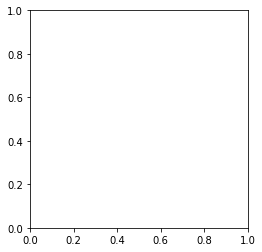

In [10]:
pylab.imshow(img, cmap="Greys")

Annnnnd... it breaks.
What went wrong?
Since images are two dimensional objects, `imshow` expects a two dimensional array of data to plot, but the rows of our data array are flat vectors.
Luckily, numpy arrays provide a `reshape` method that let us change the dimensions of our data arrays (but the total number of elements in arrays must keep the same after reshaping).
Let's reshape our image data into a 28x28 pixel square and try again:

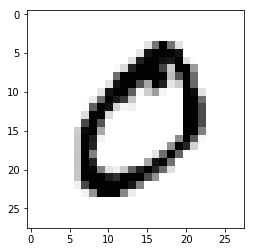

In [11]:
pylab.imshow(img.reshape(28, 28), cmap="Greys")

It's a zero!
Now we're getting somewhere.

### Question 1

* Use `imshow` to visualize a number of images from `test_sample`.  What is the order of images in `test_sample` ? (Please show some images your visualized and explain your answer based on them)

## Unsupervised KNN

Next, we're interested in uncovering more structures in the MNIST data.
For example, we want to be able to answer questions like "how similar are people's handwriting?" and "how distinct are the different digits?"
If we get a sense of the variance in the data, and of how tightly it is clustered, we can have a better view to model the data.

In a simplest way, we can look at nearest neighbors using simple Euclidean distance between pixels.
The assumption is that most digits look the same, so they should have similar values in individual pixels.
Let's find out if this assumption is good.

We can use the [`sklearn.neighbors`](http://scikit-learn.org/stable/modules/neighbors.html) module to compute nearest neighbors, in particular with the [`NearestNeighbors`](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors) class:


In [12]:
%%time
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm='brute').fit(train)

CPU times: user 117 ms, sys: 1.2 ms, total: 118 ms
Wall time: 115 ms


Note how fast we built a nearest neighbors model, just a few milliseconds!
This is because we're using the brute force implementation (`algorithm='brute'`), which simply stores the training data to build a model, and does a full pairwise comparison at query time.

Let's query our new model.  We can fetch the *k* nearest neighbors with the `kneighbors` method:

In [13]:
%%time
query_img = test[0]
_, result = model.kneighbors([query_img], n_neighbors=4)

CPU times: user 149 ms, sys: 97.3 ms, total: 247 ms
Wall time: 244 ms


Notice that query time is significant, even for a single image.
Also, notice that `kneighbors` returns two values.
The first, which we will ignore, are the distance values to the nearest neighbors.
The second is a list of indices where we can look up the nearest neighbors in the training set.

With the results, now we can see how we did.

In [14]:
print (result)

[[2857 5849 3393 3209]]


There are four results, as expected.
Let's print them out with the utility function below:

In [15]:
# Display several images in a row
# parameter 'imgs' is a numpy array where each row represents an image
# parameter 'n' is the number of images to be shown, that is, the number of images in 'imgs'  
def show(imgs, n=1):
    fig = pylab.figure()
    for i in range(0, n):
        fig.add_subplot(1, n, i+1, xticklabels=[], yticklabels=[])
        if n == 1:
            img = imgs
        else:
            img = imgs[i]
        pylab.imshow(img.reshape(28, 28), cmap="Greys")

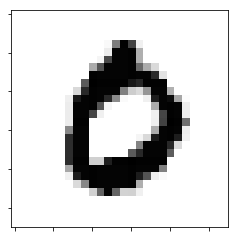

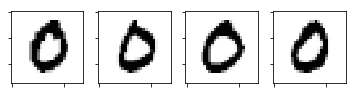

In [16]:
show(query_img)
show(train[result[0],:], len(result[0]))

The neighbors look pretty good!
Importantly, they are all zeros.
That means that to some extent, at least, our assumption about images of the same digit being "close" to one another in pixel-space is good.

### Question 2

* Use the nearest neighbors model to inspect results for other images in the `test` set. From 0 to 9, result of which digit looks the most inaccurate? (Please show some images of your results and explain your answer based on them)

## KNN Classification

We can validate our model in a more rigorous way by using it to predict digits. Scikit-learn provides a class for supervised nearest neighbors fitting called KNeighborsClassifier. It is very similar to the NearestNeighbors class, but it accepts labels when fitting a model, and it provides methods for making label predictions for testing data.

The MNIST labels are in mnist.target. Let's split them into training and testing sets as we did on the image data:


In [17]:
train_labels = mnist.target[:60000]
test_labels = mnist.target[60000:]
test_sample_labels = test_labels[::100]

Next, as before, we fit a model to the training data:

In [18]:
%%time
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=4, algorithm='brute').fit(train, train_labels)

CPU times: user 11.3 ms, sys: 0 ns, total: 11.3 ms
Wall time: 9.04 ms


## Analysis of classification
Use the KNeighborsClassifier.score method to measure the model's classification accuracy on test_sample.

In [19]:
%%time
# Score the model!
model.score(test_sample, test_sample_labels)

CPU times: user 5.57 s, sys: 7.7 ms, total: 5.58 s
Wall time: 5.57 s


0.96999999999999997

* Next, visualize the nearest neighbors of cases where the model makes incorrect predictions

(100, 784)


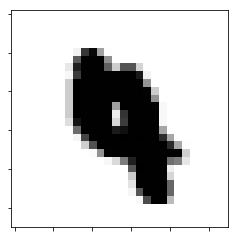

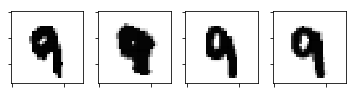

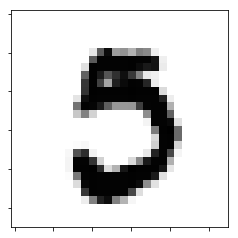

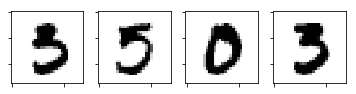

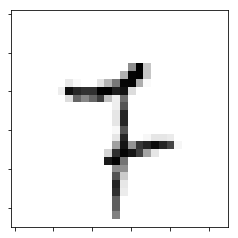

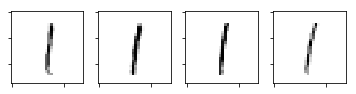

In [20]:
preds = model.predict(test_sample)
print(test_sample.shape)
errors = [i for i in range(0, len(test_sample)) if preds[i] != test_sample_labels[i]]

for i in errors:
    query_img = test_sample[i]
    _, result = model.kneighbors([query_img], n_neighbors=4)
    show(query_img)
    show(train[result[0],:], len(result[0]))

* Finally, let's get a more global view of classification errors.  To do this, we can create a **confusion matrix**, that counts how often each class is mistaken for each other class.  Use [`sklearn.metrics.confusion_matrix`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) to generate a confusion matrix between model predictions and test labels.

Now let's calculate the prediction error rates of the KNN classifier.

In [21]:
preds = model.predict(test_sample)
errors = [i for i in range(0, len(test_sample)) if preds[i] != test_sample_labels[i]]
print(len(errors))
err_rate = float(len(errors))/len(preds)
print(err_rate)

3
0.03


### Question 3


Using the model's default parameters, apply [Multinomial Naive Bayes](https://scikit-learn.org/0.19/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB), [Decision Tree](https://scikit-learn.org/0.19/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) and [Random Forest](https://scikit-learn.org/0.19/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier) classification models on the data below.  Train each model using `train_sample` data and test each model with `test_sample` data. Both `train_sample` and `test_sample` are given below. Report the following:
1. The error rate of each model on the `test_sample` data
2. The confusion matrix for the test sample data
3. Identify the pairs of digits most frequently confused with each other

In [22]:
train = mnist.data[:60000]
train_labels = mnist.target[:60000]

test = mnist.data[60000:]
test_labels = mnist.target[60000:]

# For traning
train_sample = train[::100]
train_sample_labels = train_labels[::100]
# for testing
test_sample = test[::10]
test_sample_labels = test_labels[::10]

### Question 4


Repeat question 3, but this time tune each model's parameters for better performance.  Compare the results with the results from question 3. 

In [23]:
train = mnist.data[:60000]
train_labels = mnist.target[:60000]

test = mnist.data[60000:]
test_labels = mnist.target[60000:]

# For traning
train_sample = train[::100]
train_sample_labels = train_labels[::100]
# for testing
test_sample = test[::10]
test_sample_labels = test_labels[::10]

### Extra Credit (1 pt)

Neural networks are one of the most powerful types of classifier.  We will learn more about them in upcoming lectures.  Multi-layer perceptrons are a type of neural network that is included in the Scikit library.  Test and train Scikit's [MLPClassifier](https://scikit-learn.org/stable/modules/neural_networks_supervised.html) on `train` data and `test` data respectively.  Include the error rate, the confusion matrix, and the pair of most frequently confused numbers in your report.

To get full credit you'll have to configure the model to give an error rate of less than 4%.

In [24]:
#training set
train = mnist.data[:60000]

#testing set
test = mnist.data[60000:]